<a href="https://colab.research.google.com/github/LleilaA13/Thesis-MUL/blob/main/notebooks/diversity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Licensed under the Apache License, Version 2.0 (the "License");

In [1]:
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# The Diversity Objective

This notebook demonstrates the diversity objective, which is used to generate multiple different visualizations from a single neuron or channel.

# Feature visualization w/ Diversity function:
  - it defines an img parametrization function
  - constructs an optimization objective by maximizing a specific channel in the "mixed5a" layer and by introducing a diversity loss to encourage variarion

## Install, Import, Load Model

In [2]:
!pip install --quiet git+https://github.com/greentfrapp/lucent.git

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 51.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 119.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 94.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 52.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 103.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
import torch

from lucent.optvis import render, param, transform, objectives
from lucent.modelzoo import inceptionv1

In [4]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = inceptionv1(pretrained=True)
_ = model.to(device).eval()

Downloading: "https://github.com/ProGamerGov/pytorch-old-tensorflow-models/raw/master/inception5h.pth" to /root/.cache/torch/hub/checkpoints/inception5h.pth
100%|██████████| 27.0M/27.0M [00:00<00:00, 502MB/s]


## An Example

With the diversity objective, we have to submit a batch of images for optimization. The diversity objective then tries to maximize the difference in feature representations between the images in the batch.

Specifically, the objective penalizes cosine similarity between the feature representations.

100%|██████████| 512/512 [00:35<00:00, 14.33it/s]



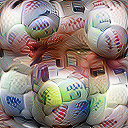
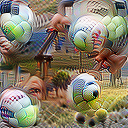
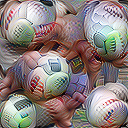
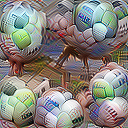

In [5]:
batch_param_f = lambda: param.image(128, batch=4) #created 4 images of size 128x128

obj = objectives.channel("mixed5a", 9) - 1e2 * objectives.diversity("mixed5a")

_ = render.render_vis(model, obj, batch_param_f, show_inline=True)
#? 1- render_vis is the main function that renders the image, this is where the input image (which starts as random noise),
#? is gradually modified to make the selected neuron fire more
#? 2- Computes how much the target neuron activates for that image
#? 3- Uses gradient ascent to tweak the pixels so that the neuron becomes more active.
#? 4- Repeats this process over multiple steps until the image clearly represents what the neuron detects.
#! this is where the input img is gradually modified to make the selected neuron fire more

# above:
This is an exampke in which we maximize activation of channel 9 in layer mixed5a, add a diversity term and the coefficient 100 balances activation strength vs. diversity

## More Examples

More examples reproducing results from the Distill article [Feature Visualization](https://distill.pub/2017/feature-visualization/).

# Below, an exmaple with more diversity:
Here the difference is that it targets channel 97 in mixed4a. instead and uses a higher diversity weight (1000), leading to even more varied outputs.

100%|██████████| 512/512 [00:21<00:00, 23.59it/s]



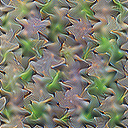
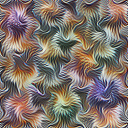
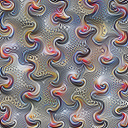
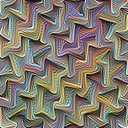

In [6]:
# Different curvy facets

obj = objectives.channel("mixed4a", 97) - 1e3 * objectives.diversity("mixed4a") # here we use a higher weight on the diversity term

_ = render.render_vis(model, obj, batch_param_f, show_inline=True)

100%|██████████| 512/512 [00:22<00:00, 22.85it/s]



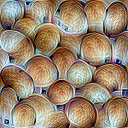
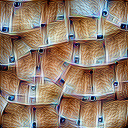
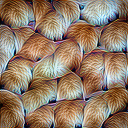
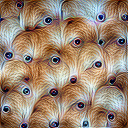

In [7]:
# Different shapes with the same fur texture

obj = objectives.channel("mixed4a", 143) - 1e2 * objectives.diversity("mixed4a")

_ = render.render_vis(model, obj, batch_param_f, show_inline=True)

100%|██████████| 512/512 [00:30<00:00, 16.67it/s]



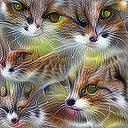
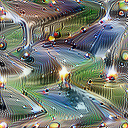
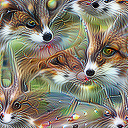
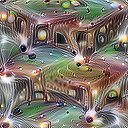

In [8]:
# Cars and Cats

obj = objectives.channel("mixed4e", 55) - 1e2 * objectives.diversity("mixed4e")

_ = render.render_vis(model, obj, batch_param_f, show_inline=True)

## Try it out!

Select your favorite channel or neuron or just pick a random one! Try adjusting the weight on the diversity term to see how that makes a difference!

100%|██████████| 512/512 [00:24<00:00, 21.02it/s]



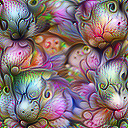
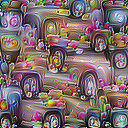
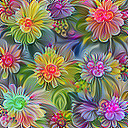
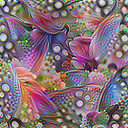

In [9]:
# Flowers and err... other stuff?

batch_param_f = lambda: param.image(128, batch=4, decorrelate=False) # disable channel decorrelation for more trippy images

obj = objectives.channel("mixed4d_3x3_bottleneck_pre_relu_conv", 139) - 1e3 * objectives.diversity("mixed4d_3x3_bottleneck_pre_relu_conv")

_ = render.render_vis(model, obj, batch_param_f, show_inline=True)

## What is happening here?
This notebook is visualizing what different neurons, or channels, in INCEPTIONV1 "see".

# Define the objective: make the nw activate a specific neuron
    obj = objectives.channel("mixed5a", 9) - 1e2 * objectives.diversity("mixed5a")
        we want channel 9 to become as active as possible, thus this forces the nw to generate an image that storngly activates that specific neuron.
        objectives.diversity() encourages varied images instead of identical ones. the -1e2* means diversity is weighted 100 times less than activation.
    Without diversity, we'd get 4 almost identical images, with it instead the nw tries different ways to activate the same neuron, leading to more creative and diverse results.


## Diversity
Diversity means encouraging the model to generate multiple different-looking images that all activate the same neuron instead of producing nearly identical results.

## W/o Diversity:
If we only maximize a neuron's activation (objectives.channel()), all generated will look very similar.
    - We don't explore all possible ways the neuron could be activated.
    - We don't learn about the full range of features the neuron detects.

## How does diversity work?
objectives.diversity("mixed5a")
 - this term penalizes images that are too similar, it forces the model to find different ways to activate the same neuron.
 - Mathematically, diversity loss encourages high variance accross the batch of generated images. This ensures that the optimization doesn't settle on just one solution but explores multiple different ones.  
